In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import datetime

%matplotlib inline
plt.rcParams['font.family'] = 'IPAPGothic'

In [4]:
train_A = pd.read_table('data/train/train_A.tsv')
train_B = pd.read_table('data/train/train_B.tsv')
train_C = pd.read_table('data/train/train_C.tsv')
train_D = pd.read_table('data/train/train_D.tsv')
trains = [train_A, train_B, train_C, train_D]
names = [u'A 人材', u'B 旅行', u'C 不動産', u'D アパレル']

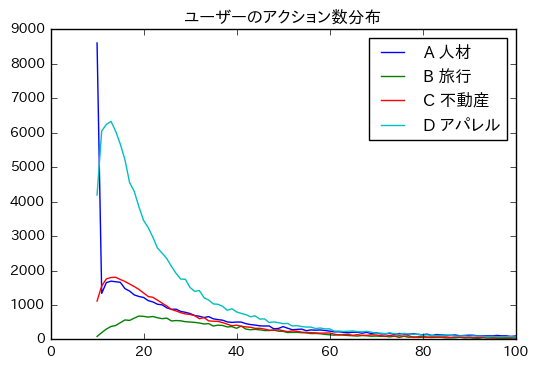

In [3]:
for train in trains:
    plt.plot(train['user_id'].value_counts().value_counts().sort_index());
plt.legend(names);
plt.title(u'ユーザーのアクション数分布');
plt.xlim(0,100);

- 「10回以上アクションしたユーザのデータ」だと思われる
- 人材の10回だけ異常に多い→なぜ?

## 各アクションの回数の分布

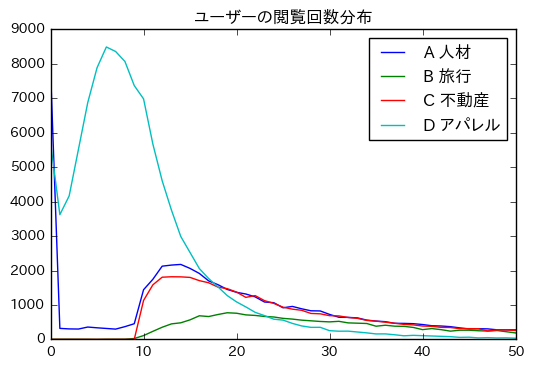

In [13]:
for train in trains:
    train['event_type_1'] = train['event_type'].map(lambda x: x==1)
    plt.plot(train.groupby('user_id')['event_type_1'].sum().value_counts().sort_index());
plt.legend(names);
plt.title(u'ユーザーの閲覧回数分布');
plt.xlim(0,50);
plt.ylim(0, 9000);

- アパレル…閲覧が10回以下の人が多い→とりあえずカートに入れる人が多い?

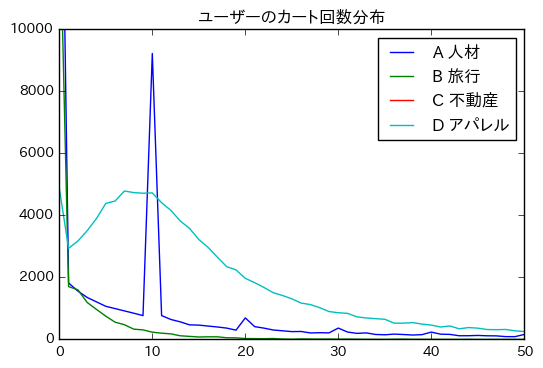

In [14]:
for train in trains:
    train['event_type_0'] = train['event_type'].map(lambda x: x==0)
    plt.plot(train.groupby('user_id')['event_type_0'].sum().value_counts().sort_index());
plt.legend(names);
plt.title(u'ユーザーのカート回数分布');
plt.xlim(0,50);
plt.ylim(0, 10000);

- 不動産はカートが無い
- 人材は10の倍数が尖っている→10人まとめてカートに入れている?

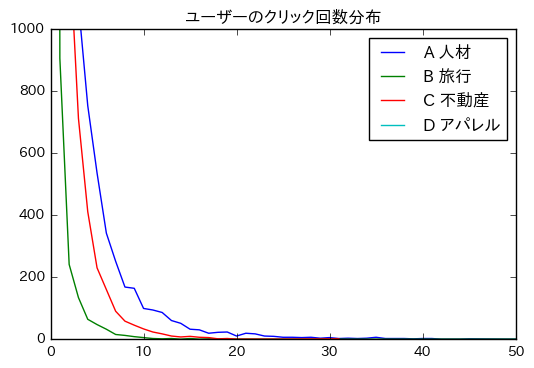

In [16]:
for train in trains:
    train['event_type_2'] = train['event_type'].map(lambda x: x==2)
    plt.plot(train.groupby('user_id')['event_type_2'].sum().value_counts().sort_index());
plt.legend(names);
plt.title(u'ユーザーのクリック回数分布');
plt.xlim(0,50);
plt.ylim(0, 1000);

- アパレルはクリックが無い

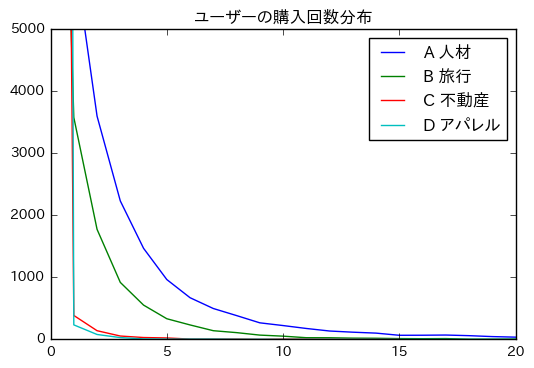

In [21]:
for train in trains:
    train['event_type_3'] = train['event_type'].map(lambda x: x==3)
    plt.plot(train.groupby('user_id')['event_type_3'].sum().value_counts().sort_index());
plt.legend(names);
plt.title(u'ユーザーの購入回数分布');
plt.xlim(0,20);
plt.ylim(0,5000);

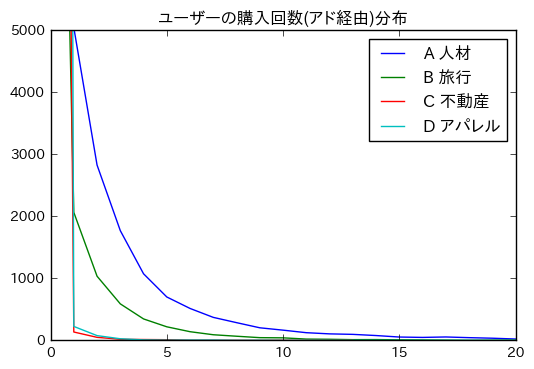

In [20]:
for train in trains:
    train['event_type_3_ad'] = np.logical_and(train['event_type'].map(lambda x: x==3), train['ad'].map(lambda x: x==1))
    plt.plot(train.groupby('user_id')['event_type_3_ad'].sum().value_counts().sort_index());
plt.legend(names);
plt.title(u'ユーザーの購入回数(アド経由)分布');
plt.xlim(0,20);
plt.ylim(0,5000);

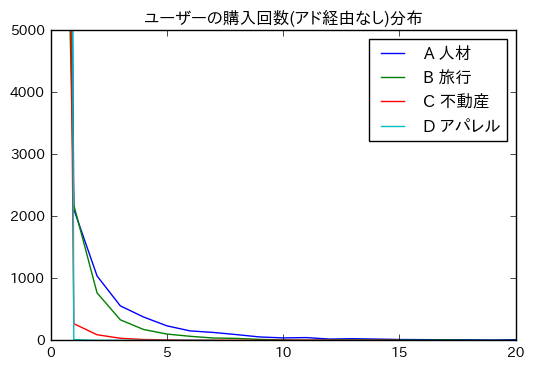

In [19]:
for train in trains:
    train['event_type_3_nonad'] = np.logical_and(train['event_type'].map(lambda x: x==3), train['ad'].map(lambda x: x==0))
    plt.plot(train.groupby('user_id')['event_type_3_nonad'].sum().value_counts().sort_index());
plt.legend(names);
plt.title(u'ユーザーの購入回数(アド経由なし)分布');
plt.xlim(0,20);
plt.ylim(0,5000);

### カテゴリごとの仮説

- 人材…10人ごとにカートに入れられているとしたら、まとめられているグループでクラスタリングできるのではないか？
- アパレル…カートに入れられる数が多いので、カートに入れたものが購入されやすいと推定できないか？
- 旅行を複数買っている人は、小規模な週末旅行などの可能性が高いので、1つだけの人の商品と区別できないか？